In [ ]:
#imports

import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN
from sklearn.preprocessing import MinMaxScaler
import pickle 
import os 

In [ ]:
#%cd ./drive/MyDrive/EmbeddedCasestudy/CSV
# Using a pandas dataframe to load the data from recordings
#sitting
df_sitting1 = pd.read_csv('/content/Sitting 1.csv')
df_sitting1.head()
df_sitting1.drop(['Time (s)'],axis=1,inplace=True)
dataset_sit1 = np.array(df_sitting1)
x_dataset_sit1=dataset_sit1[1000:-1000,:3]

df_sitting2 = pd.read_csv('/content/Sitting 2.csv')
df_sitting2.head()
df_sitting2.drop(['Time (s)'],axis=1,inplace=True)
dataset_sit2 = np.array(df_sitting2)
x_dataset_sit2=dataset_sit2[1000:-1000,:3]

#walking
df_walking1 = pd.read_csv('/content/Walking 1.csv')
df_walking1.head()
df_walking1.drop(['Time (s)'],axis=1,inplace=True)
dataset_walk1 = np.array(df_walking1)
x_dataset_walk1=dataset_walk1[1000:-1000,:3]

df_walking2 = pd.read_csv('/content/Walking 2.csv')
df_walking2.head()
df_walking2.drop(['Time (s)'],axis=1,inplace=True)
dataset_walk2 = np.array(df_walking2)
x_dataset_walk2=dataset_walk2[1000:-1000,:3]

#running
df_run1 = pd.read_csv('/content/Running 1.csv')
df_run1.head()
df_run1.drop(['Time (s)'],axis=1,inplace=True)
dataset_run1 = np.array(df_run1)
x_dataset_run1=dataset_run1[1000:14000,:3]

df_run2 = pd.read_csv('/content/Running 2.csv')
df_run2.head()
df_run2.drop(['Time (s)'],axis=1,inplace=True)
dataset_run2 = np.array(df_run2)
x_dataset_run2=dataset_run2[1000:-1000,:3]


print(x_dataset_sit1.shape, x_dataset_sit2.shape, x_dataset_walk1.shape, x_dataset_walk2.shape, x_dataset_run1.shape, x_dataset_run2.shape)


(61979, 3) (58121, 3) (12469, 3) (55094, 3) (13000, 3) (34468, 3)


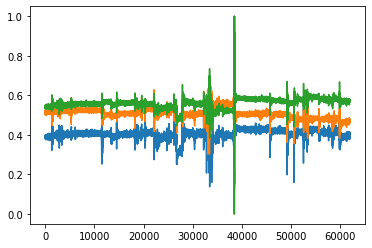

In [ ]:
scaler = MinMaxScaler()
x_dataset_sit1 = scaler.fit_transform(x_dataset_sit1)
plt.plot(x_dataset_sit1)

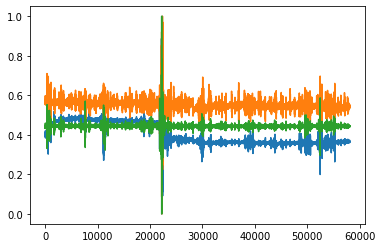

In [ ]:
x_dataset_sit2 = scaler.fit_transform(x_dataset_sit2)
plt.plot(x_dataset_sit2)

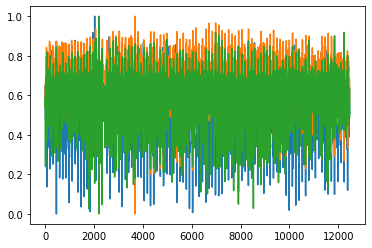

In [ ]:
x_dataset_walk1 = scaler.fit_transform(x_dataset_walk1)
plt.plot(x_dataset_walk1)

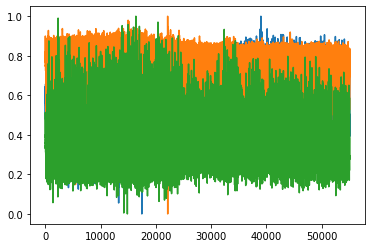

In [ ]:
x_dataset_walk2 = scaler.fit_transform(x_dataset_walk2)
plt.plot(x_dataset_walk2)

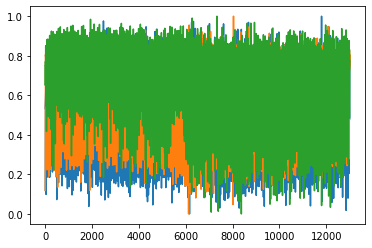

In [ ]:
x_dataset_run1 = scaler.fit_transform(x_dataset_run1)
plt.plot(x_dataset_run1)

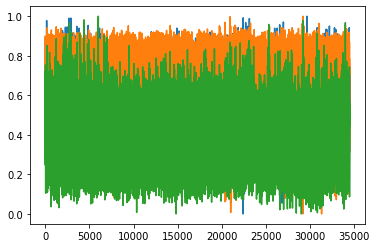

In [ ]:
x_dataset_run2 = scaler.fit_transform(x_dataset_run2)
plt.plot(x_dataset_run2)

In [ ]:
x_dataset_walk1[2600]

array([0.47569172, 0.65231436, 0.65000434])

In [ ]:
import tensorflow as tf
#getdata function creates data for training gru model
#data is the raw dataset, three acc columns
#datatype 0 = sitting , 1 = walking, 2 = running
# lookback is the sample rate
# interval defines time interval
# fr is the dataset frequency
def getdata(data, datatype, lookback, interval,fr):
  finterval=interval*fr
  period=finterval//(lookback-1) #period= steps of extracing data
  X,Y=[],[]
  for i in range(len(data)-finterval):
    samplelist=[]
    for j in range(lookback):
      samplelist.append(data[i+(j*period),:3])
    X.append(samplelist)
    Y.append(datatype)
    # one hot encoding
  Y = tf.one_hot(Y, 3).numpy()
  return np.array(X),np.array(Y)
lookback=12  
interval=120
fr=100

x_processed_sit1,y_processed_sit1=getdata(x_dataset_sit1, 0,lookback,interval,fr)
x_processed_sit2,y_processed_sit2=getdata(x_dataset_sit2, 0,lookback,interval,fr)
x_processed_walk1,y_processed_walk1=getdata(x_dataset_walk1, 1,lookback,interval,fr)
x_processed_walk2,y_processed_walk2=getdata(x_dataset_walk2, 1,lookback,interval,fr)
x_processed_run1,y_processed_run1=getdata(x_dataset_run1, 2,lookback,interval,fr)
x_processed_run2,y_processed_run2=getdata(x_dataset_run2, 2,lookback,interval,fr)

print(x_processed_sit1.shape,x_processed_sit2.shape,y_processed_walk1.shape,y_processed_walk2.shape,x_processed_run1.shape,x_processed_run2.shape)

(49979, 12, 3) (46121, 12, 3) (469, 3) (43094, 3) (1000, 12, 3) (22468, 12, 3)


In [ ]:
X_sit=np.concatenate((x_processed_sit1,x_processed_sit2),axis=0)
X_walk=np.concatenate((x_processed_walk1,x_processed_walk2),axis=0)
X_run=np.concatenate((x_processed_run1,x_processed_run2),axis=0)
print(X_sit.shape,X_walk.shape,X_run.shape)


(96100, 12, 3) (43563, 12, 3) (23468, 12, 3)


In [ ]:
X_walk[200:210]

array([[[0.32747146, 0.8490678 , 0.74289546],
        [0.49095883, 0.64647899, 0.58214139],
        [0.54015624, 0.71551694, 0.63378149],
        [0.59635231, 0.66227199, 0.47813798],
        [0.63660038, 0.71355598, 0.53974022],
        [0.28555791, 0.77650702, 0.76421573],
        [0.6030645 , 0.75843585, 0.6187563 ],
        [0.50331091, 0.67390309, 0.62842135],
        [0.72323779, 0.72768382, 0.67477156],
        [0.69358397, 0.58201921, 0.63584833],
        [0.4951408 , 0.73890956, 0.61349201],
        [0.47395318, 0.67516463, 0.6024553 ]],

       [[0.31984806, 0.80191192, 0.7383327 ],
        [0.47947609, 0.65737902, 0.60255134],
        [0.5336518 , 0.71375162, 0.63406496],
        [0.63337373, 0.63498471, 0.49919739],
        [0.68981188, 0.70078232, 0.54243972],
        [0.30207321, 0.85252242, 0.70174554],
        [0.58723723, 0.76107671, 0.62471811],
        [0.51152514, 0.67795932, 0.60810485],
        [0.62033196, 0.70563015, 0.6718367 ],
        [0.6841498 , 0.61253203,

In [ ]:
#y_sit1 = tf.one_hot(y_processed_sit1, 3).numpy()
#y_sit2 = tf.one_hot(y_processed_sit2, 3).numpy()
Y_sit=np.concatenate((y_processed_sit1,y_processed_sit2),axis=0)

#y_walk1 = tf.one_hot(y_processed_walk1, 3).numpy()
#y_walk2 = tf.one_hot(y_processed_walk2, 3).numpy()
Y_walk=np.concatenate((y_processed_walk1,y_processed_walk2),axis=0)

#y_run1 = tf.one_hot(y_processed_run1, 3).numpy()
#y_run2 = tf.one_hot(y_processed_run2, 3).numpy()
Y_run=np.concatenate((y_processed_run1,y_processed_run2),axis=0)

print(Y_sit.shape, Y_walk.shape, Y_run.shape)

(96100, 3) (43563, 3) (23468, 3)


In [ ]:
Y_run[2000]


array([0., 0., 1.], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_sit_train, X_sit_test, Y_sit_train, Y_sit_test = train_test_split(X_sit, Y_sit, test_size=0.2, random_state=0)
X_walk_train, X_walk_test, Y_walk_train, Y_walk_test = train_test_split(X_walk, Y_walk, test_size=0.2, random_state=0)
X_run_train, X_run_test, Y_run_train, Y_run_test = train_test_split(X_run, Y_run, test_size=0.2, random_state=0)

print(X_sit_train.shape, X_sit_test.shape, Y_walk_train.shape, Y_walk_test.shape, X_run_train.shape, Y_run_test.shape)

(76880, 12, 3) (19220, 12, 3) (34850, 3) (8713, 3) (18774, 12, 3) (4694, 3)


In [ ]:
X_train= np.concatenate((X_sit_train, X_walk_train, X_run_train), axis=0)
X_test=np.concatenate((X_sit_test, X_walk_test, X_run_test), axis=0)
Y_train= np.concatenate((Y_sit_train, Y_walk_train, Y_run_train), axis=0)
Y_test=np.concatenate((Y_sit_test, Y_walk_test, Y_run_test), axis=0)

In [ ]:
X_train[7565:7570]
Y_train[7565:7570]


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

LSTM MODEL 

In [ ]:
model=Sequential()
model.add(LSTM(20,input_shape=(lookback,3)))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1920      
                                                                 
 dense (Dense)               (None, 4)                 84        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
Total params: 2,019
Trainable params: 2,019
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, batch_size=1, epochs=5)

#plt.figure(figsize=(14,5))
#plt.plot(y_test, label = 'y_test')
#plt.plot(y_pred, label = 'y_pred')
#plt.legend()
#plt.show()

Epoch 1/5
130504/130504 [==============================] - 551s 4ms/step - loss: 0.0367 - accuracy: 0.9299
Epoch 2/5
130504/130504 [==============================] - 559s 4ms/step - loss: 0.0087 - accuracy: 0.9853
Epoch 3/5
130504/130504 [==============================] - 550s 4ms/step - loss: 0.0379 - accuracy: 0.9221
Epoch 4/5
130504/130504 [==============================] - 549s 4ms/step - loss: 0.0731 - accuracy: 0.8524
Epoch 5/5
130504/130504 [==============================] - 529s 4ms/step - loss: 0.0234 - accuracy: 0.9567


In [ ]:
# Fit the full prediction pipeline to the training data
model.fit(X_train, Y_train)

In [ ]:
model.evaluate(X_test, Y_test)


1020/1020 [==============================] - 3s 2ms/step - loss: 0.0083 - accuracy: 0.9873


[0.0083470419049263, 0.9873417615890503]

In [ ]:
# MOVEMENT of user are classified. 3 class are used
ACTIVITIES = {
    0: 'sitting',
    1: 'walking',
    2: 'runing',
}

# Confusion Matrix
def confusion_matrix(Y_true, Y_pred):
    
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])
    plt.show()
confusion_matrix(Y_test, model.predict(X_test))


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
plt.plot(history.history['accuracy'])


In [ ]:
# path to the SavedModel directory 
model.save('/content/drive/MyDrive/DIT /Embedded System/LSTM App/Models/model.h5')
#model.save('/content/drive/MyDrive/DIT /Embedded System/LSTM App/Models')

In [ ]:
from keras.models import load_model
model_loaded = load_model('/content/drive/MyDrive/DIT /Embedded System/LSTM App/Models/model.h5')


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_loaded, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# path to the SavedModel directory
model = tf.saved_model.load('/content/drive/MyDrive/DIT /Embedded System/LSTM App/Models') 
# tflite_model = converter.convert()

In [ ]:
os.chdir('/content/drive/MyDrive/DIT /Embedded System/LSTM App/Models')
with open('Suleman_PKL', 'wb') as files:
    pickle.dump(model, files)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/DIT /Embedded System/LSTM App/Models') 
# path to the SavedModel directory

converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]

tflite_model = converter.convert()


In [ ]:
import os
os.chdir('/content/drive/MyDrive/DIT /Embedded System/LSTM App/Models')

# Save the model.
with open('suleman_model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
